In [1]:
import nsp_sandbox.NSP_builder as b


In [3]:
builder = b.NSPbuilder()
builder.set_n_days(7*4)
builder.set_n_jobs(60)
builder.set_n_nurses(150)
builder.gen_demand()
builder.gen_skills()



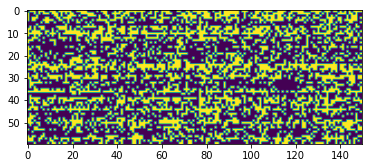

In [4]:
import matplotlib.pyplot as plt
plt.imshow(builder.S)

In [5]:
import numpy as np
S = np.transpose(builder.S)
res = np.apply_along_axis(lambda x : np.outer(x,x),1, S)
print( res.shape)
total_skill_count = np.sum(res,0)
total_probs = np.diag(total_skill_count)/S.shape[0]

(150, 60, 60)


In [6]:
mean = np.mean(total_probs)
var = np.cov(total_probs)
print(mean)
print(var)

0.42566666666666675
0.03166225988700565


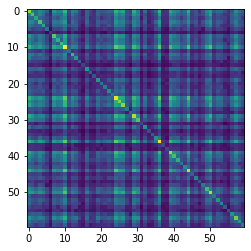

In [7]:
probs = np.array([total_skill_count[s] / builder.n_nurses for s in range(total_skill_count.shape[0])])
plt.imshow(probs)

In [8]:
print(np.mean(builder.job_skill_exp))
print(np.mean(builder.job_skill_cov))
print(builder.job_skill_exp.shape)
print(builder.job_skill_cov.shape)
print(builder.job_skill_prob.shape)

0.3914020733742455
0.015263840313770163
(60,)
(60, 60)
(150, 60)


0.005783041148775894
1.5300870333337317e-05
0.008025445699937225
3.503256132644821e-05


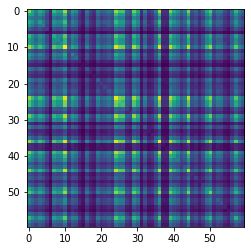

In [9]:
cov = np.cov(probs)
plt.imshow(cov)
cov_mean = np.mean(cov.flatten())
cov_var = np.cov(cov.flatten())
print(cov_mean)
print(cov_var)
cov_mean = np.mean(np.diag(cov))
cov_var = np.cov(np.diag(cov))
print(cov_mean)
print(cov_var)

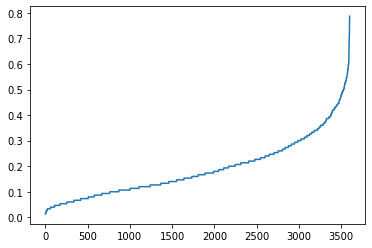

In [10]:
plt.plot(np.sort(probs.flatten()))
plt.show()

In [19]:
cov_diag = np.diag(cov)
diag_mean = np.mean(cov_diag)
diag_std = np.std(cov_diag)
print(diag_mean)
print(diag_std)

0.008521443607449258
0.009005503029052151
